# Universidad Externado de Colombia
## Finanzas Computacionales

## Taller 3

Trabajado por:

*   Juan Andres Restrepo
*   Manuel Alejandro Zarabanda

In [ ]:
%pip install --quiet yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from scipy import stats
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import cvxpy as cp
import warnings
warnings.filterwarnings("ignore")

1. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información  histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y  con cierre a Dic-2022: 


a. Estimar los parámetros del modelo de mercado de las cinco acciones y 
construir un  DataFrame donde se resuman los caculos de: retornos esperados (promedio), volatilidades,  betas, retornos estimados (CAPM) y el coeficiente de determinación de cada uno.


In [ ]:
# Selección de acciones y indice
precios_AAPL=yf.download("AAPL",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
precios_VZ=yf.download("VZ",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
precios_KO=yf.download("KO",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
precios_GS=yf.download("GS",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
precios_MSFT=yf.download("MSFT",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
p_indice=yf.download("^DJI",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Retornos
retornos_AAPL=np.log(precios_AAPL/precios_AAPL.shift()).dropna()
retornos_VZ=np.log(precios_VZ/precios_VZ.shift()).dropna()
retornos_KO=np.log(precios_KO/precios_KO.shift()).dropna()
retornos_GS=np.log(precios_GS/precios_GS.shift()).dropna()
retornos_MSFT=np.log(precios_MSFT/precios_MSFT.shift()).dropna()
r_indice=np.log(p_indice/p_indice.shift()).dropna()

In [ ]:
# Retornos esperados
re_AAPL=pd.DataFrame([np.mean(retornos_AAPL)])
re_VZ=pd.DataFrame([np.mean(retornos_VZ)])
re_KO=pd.DataFrame([np.mean(retornos_KO)])
re_GS=pd.DataFrame([np.mean(retornos_GS)])
re_MSFT=pd.DataFrame([np.mean(retornos_MSFT)])

In [ ]:
# Volatilidades
sigma_AAPL=np.std(retornos_AAPL)
sigma_VZ=np.std(retornos_VZ)
sigma_KO=np.std(retornos_KO)
sigma_GS=np.std(retornos_GS)
sigma_MSFT=np.std(retornos_MSFT)

In [ ]:
# Constantes
Y_AAPL = retornos_AAPL
Y_VZ = retornos_VZ
Y_KO = retornos_KO
Y_GS = retornos_GS
Y_MSFT = retornos_MSFT
X = r_indice

In [ ]:
CAPM_AAPL = sm.OLS(Y_AAPL, sm.add_constant(X)).fit()
print(CAPM_AAPL.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     38.48
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           6.29e-08
Time:                        03:51:25   Log-Likelihood:                 73.718
No. Observations:                  60   AIC:                            -143.4
Df Residuals:                      58   BIC:                            -139.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.009      1.524      0.1

In [ ]:
CAPM_VZ = sm.OLS(Y_VZ, sm.add_constant(X)).fit()
print(CAPM_VZ.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     12.21
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           0.000919
Time:                        03:51:28   Log-Likelihood:                 101.51
No. Observations:                  60   AIC:                            -199.0
Df Residuals:                      58   BIC:                            -194.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.006     -0.510      0.6

In [ ]:
CAPM_KO = sm.OLS(Y_KO, sm.add_constant(X)).fit()
print(CAPM_KO.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     43.40
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.44e-08
Time:                        03:51:31   Log-Likelihood:                 103.96
No. Observations:                  60   AIC:                            -203.9
Df Residuals:                      58   BIC:                            -199.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.006      0.832      0.4

In [ ]:
CAPM_GS = sm.OLS(Y_GS, sm.add_constant(X)).fit()
print(CAPM_GS.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.95e-16
Time:                        03:51:33   Log-Likelihood:                 93.013
No. Observations:                  60   AIC:                            -182.0
Df Residuals:                      58   BIC:                            -177.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.007     -0.049      0.9

In [ ]:
CAPM_MSFT = sm.OLS(Y_MSFT, sm.add_constant(X)).fit()
print(CAPM_MSFT.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     59.29
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.95e-10
Time:                        03:51:35   Log-Likelihood:                 103.86
No. Observations:                  60   AIC:                            -203.7
Df Residuals:                      58   BIC:                            -199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.006      2.512      0.0

In [ ]:
# Betas y retorno esperado
beta_AAPL = CAPM_AAPL.params[1]
rf = 0
re_CAPM_AAPL = re_AAPL + beta_AAPL * (r_indice.mean() - rf)
rsqrt_AAPL = CAPM_AAPL.rsquared

In [ ]:
beta_VZ = CAPM_VZ.params[1]
rf = 0
re_CAPM_VZ = re_VZ + beta_VZ * (r_indice.mean() - rf)
rsqrt_VZ = CAPM_VZ.rsquared

In [ ]:
beta_KO = CAPM_KO.params[1]
rf = 0
re_CAPM_KO = re_KO + beta_KO * (r_indice.mean() - rf)
rsqrt_KO = CAPM_KO.rsquared

In [ ]:
beta_GS = CAPM_GS.params[1]
rf = 0
re_CAPM_GS = re_GS + beta_GS * (r_indice.mean() - rf)
rsqrt_GS = CAPM_GS.rsquared

In [ ]:
beta_MSFT = CAPM_MSFT.params[1]
rf = 0
re_CAPM_MSFT = re_MSFT + beta_MSFT * (r_indice.mean() - rf)
rsqrt_MSFT = CAPM_MSFT.rsquared

In [ ]:
r_esperado = pd.DataFrame({"r_esperado" : [re_AAPL, re_VZ, re_KO, re_GS, re_MSFT]})
sigma = pd.DataFrame({"sigma" : [re_AAPL, re_VZ, re_KO, re_GS, re_MSFT]})

In [ ]:
results = pd.DataFrame({
    "Retorno esperado" : [re_AAPL, re_VZ, re_KO, re_GS, re_MSFT],
    "Sigma" : [sigma_AAPL, sigma_VZ, sigma_KO, sigma_GS, sigma_MSFT],
    "Beta": [beta_AAPL, beta_VZ, beta_KO, beta_GS, beta_MSFT],
    "Retorno estimado": [re_CAPM_AAPL, re_CAPM_VZ, re_CAPM_KO, re_CAPM_GS, re_CAPM_MSFT],
    "Coeficiente determinacion": [rsqrt_AAPL, rsqrt_VZ, rsqrt_KO, rsqrt_GS, rsqrt_MSFT]
})
acciones = ["AAPL", "VZ", "KO", "GS", "MSFT"]
results.index = acciones
results.index.name = "Acción"
results

,Retorno esperado,Sigma,Beta,Retorno estimado,Coeficiente determinacion
Acción,,,,,
AAPL,0 0 0.01954,0.091343,1.085104,0 0 0.024845,0.398821
VZ,0 0 -0.001116,0.049034,0.384591,0 0 0.000765,0.173853
KO,0 0 0.008096,0.056565,0.696104,0 0 0.0115,0.427994
GS,0 0 0.006664,0.091770,1.430769,0 0 0.01366,0.686942
MSFT,0 0 0.018183,0.060943,0.815054,0 0 0.022168,0.505486


b. Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del  CAPM y las betas de los activos.  


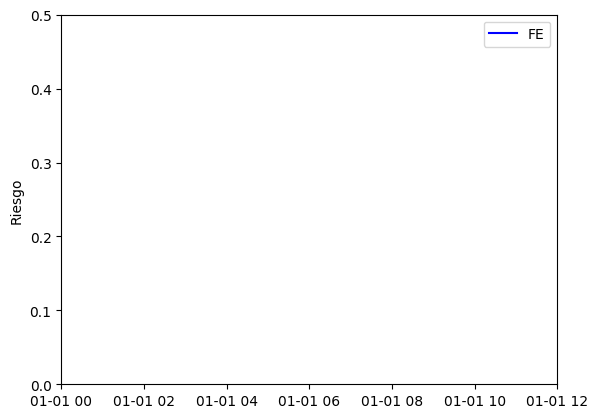

In [ ]:
from scipy.special import beta
#Frontera eficiente
rel_b_ret = (retornos_AAPL/beta_AAPL)+(retornos_GS/beta_GS)
plt.plot(rel_b_ret,'blue',label='FE')
plt.ylabel('Retorno Esperado')
plt.ylabel('Riesgo')
plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.legend()
plt.show();

2. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información  histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y  con cierre a Dic-2022, construya el portafolio óptimo tangente (máximo ratio de Sharpe). 
 
a. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad. Nota:  tomar solo posiciones largas en el portafolio. 


In [ ]:
%pip install --quiet yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from scipy import stats
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import cvxpy as cp
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm

In [ ]:
activos = ['AAPL', 'VZ', 'KO', 'GS', 'MSFT']
precios = yf.download(activos, start='2017-12-01', end='2022-12-31', interval='1Mo')['Adj Close']
retornos = np.log(precios/precios.shift()).dropna()
mu = retornos.mean()
cov = retornos.cov()

[*********************100%***********************]  5 of 5 completed


In [ ]:
n = len(mu)
x = cp.Variable(n)
objetive = cp.Minimize(cp.quad_form(x,cov)) 
constraints = [x @ mu == 1, x>=0] 
prob = cp.Problem(objetive,constraints)
prob.solve()
sharpe = round(pd.DataFrame(x.value/sum(x.value)),3)
sharpe.index=activos
sharpe.columns=['Pesos']
sharpe

,Pesos
AAPL,0.042
VZ,0.000
KO,0.149
GS,0.810
MSFT,0.000


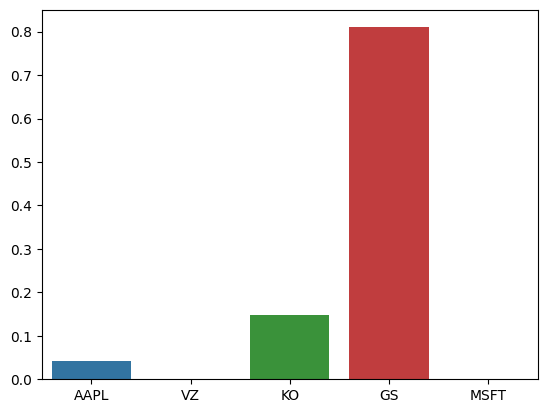

In [ ]:
sns.barplot(sharpe.T);

In [ ]:
n=5
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [cp.sum(x) == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
rs = x.value
rs

array([1.58863694e-02, 6.33521143e-21, 2.51377024e-01, 2.45409725e-01,
       4.87326881e-01])

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el  modelo estándar o paramétrico. 


In [ ]:
#VaR con nivel de confianza del 95%
ret=retornos@rs
rp=ret.mean()
sigmap=ret.std()
alpha=0.05
VaRp=rp-norm.ppf(1-alpha)*sigmap
VaRp

-0.06167319191677174

In [ ]:
#VaR con nivel de confianza del 99%
alpha2=0.01
VaRp2=rp-norm.ppf(1-alpha2)*sigmap
VaRp2

-0.08982092118044026

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el  modelo de estimación histórica. 

In [ ]:
# Estimacion Historica
np.percentile(ret,5)

-0.07057243479128592

In [ ]:
np.percentile(ret,1)

-0.08962963300322899

d. Utilice el método de Monte Carlo para construir una muestra aleatoria de 10.000  portafolios. Con esta muestra aleatoria calcular el VaR de simulación del portafolio.

In [ ]:
#Montecarlo Simulación VaR
unif_dis=np.random.normal(rp,sigmap,10000)
simulacion=np.percentile(unif_dis,5)
simulacion

-0.06180238585240059

e. ¿Se encuentran diferencias significativas entre el VaR de simulación y el VaR de
paramétrico?

In [ ]:
#No hay una gran diferencia entre el vaR de simulacion y el VaR parametrico cuando este tiene un nivel de confianza de 95%

3. Los precios de activos riesgos en el mercado describen un proceso estocástico {St
}
t≥0

que satisface:

St = S0 exp{(μ– 1/2σ
2
)dt + σ dWt
}

Donde: μ es la tasa de retorno del activo, σ es su volatilidad y Wt es un proceso estándar de
Wiener. A partir de esta expresión es posible simular el precio del activo en algún instante de
tiempo t.

a. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022,
estime los parámetros μ y σ. Utilice el método de Monte Carlo para generar una muestra
aleatoria de 10.000 posibles valores del precio del activo en el instante t = 1. Presente
gráficamente las primeras 20 trayectorias del proceso.

In [ ]:
precio = yf.download('MSFT', start='2017-12-01', end='2022-12-31', interval='1Mo')['Adj Close']
retornos = np.log(precios/precios.shift()).dropna()
mu = retornos.mean()
sigma = retornos.std()

[*********************100%***********************]  1 of 1 completed


b. Construya el histograma de los precios y retornos al final del periodo (t = 1). ¿qué puede
concluir de la forma de los histogramas?

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * (sigma ** 2)) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

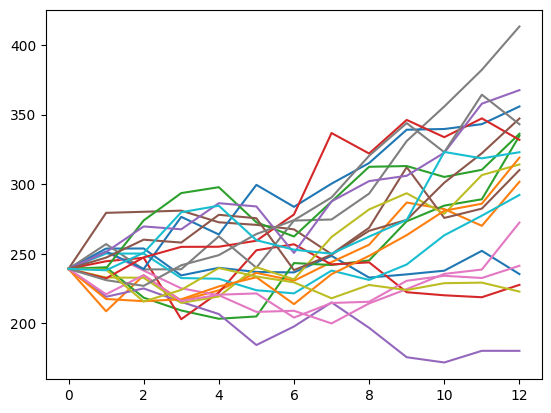

In [ ]:
T = 1 
mu = mu*12
sigma = sigma*np.sqrt(12)
S0 = precio.tail(1)
NS = 20
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St));


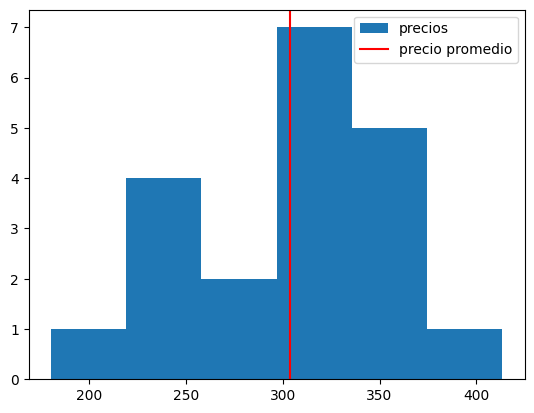

In [ ]:
plt.hist(St[:,-1], bins= "sturges", label='precios')
plt.axvline(St[:,-1].mean(), color='r', label='precio promedio')
plt.legend();

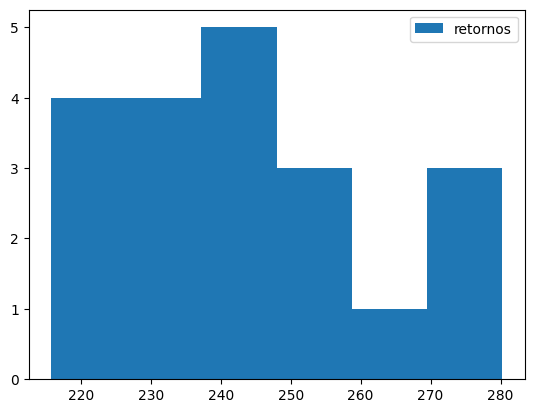

In [ ]:
plt.hist(St[:,2], bins= "sturges", label='retornos')
plt.legend();  

c. Demuestre que el valor del precio simulado de la acción en T converge a ST exp{μ T}.

In [ ]:
S0 * np.exp((mu)* T)

Date
2022-12-01    243.610272
Name: Adj Close, dtype: float64

d. Calcule la probabilidad de que el precio de la acción sea inferior a S0.

In [ ]:
retornos_datos = pd.DataFrame(retornos)
S01 = retornos_datos.iloc[-1]
probabilidad = S01<0
probabilidad.value_counts()/NS

True    0.05
Name: 2022-12-01 00:00:00, dtype: float64

4. Un tipo de proceso estocástico asociados al movimiento Browniano y que se utilizan
ampliamente en finanzas son los llamados procesos de reversión a la media. Dentro de
estos se encuentra el proceso Ornstein-Uhlenbeck, que es un proceso Xt que satisface:

Xt+dt = Xt + (μ–Xt)dt + σ(Wt+dt − Wt)

a. Utilice el método de Monte Carlo para realizar una simulación de 10000 posibles
trayectorias (NS) de este proceso considerando los siguientes valores: X0 = 1, μ = 3, σ = 0. 3, T = 5, NS = 100, dt = T/m. Presente gráficamente los resultados para las primeras 10 trayectorias del proceso.

In [ ]:
X0 = 1
def PathsOU(X0,mu,sigma,T,NS,M):
  Z = np.random.normal (0.0,1.0,[NS,M])
  X = np.zeros([NS, M+1])
  X0 = X[:,0]
  dt = T/M
  k=1
  std_dt = np.sqrt(sigma*2 / (2*k) * (1-np.exp(-2*k*dt)))
  for t in range (0,M):
    X[:,t++1] = mu + np.exp(-k*dt) * (X[:,t]-mu) + std_dt * Z[:,t]
  return X

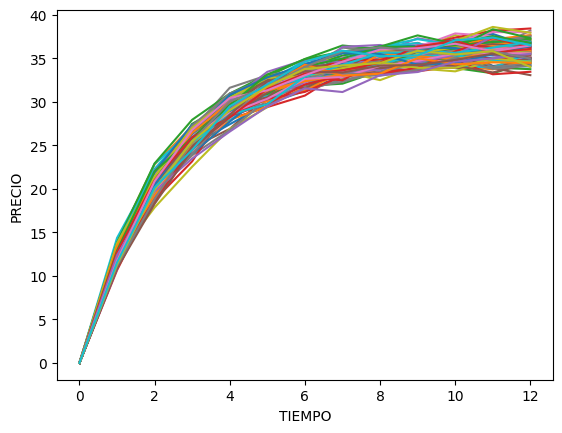

In [ ]:
T = 5
mu = 3*12
sigma = 0.3*np.sqrt(12)
X0 = 1
NS = 100
M = 12
xt = PathsOU(X0,mu,sigma,T,NS,M)
plt.plot(np.transpose(xt))
plt.xlabel("TIEMPO")
plt.ylabel("PRECIO")
plt.show()

b. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué puede
concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en el largo
plazo?

In [ ]:
#Se puede concluir que las simulaciones presentaran una tendencia logaritmica positiva

c. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso
Ornstein-Uhlenbeck?

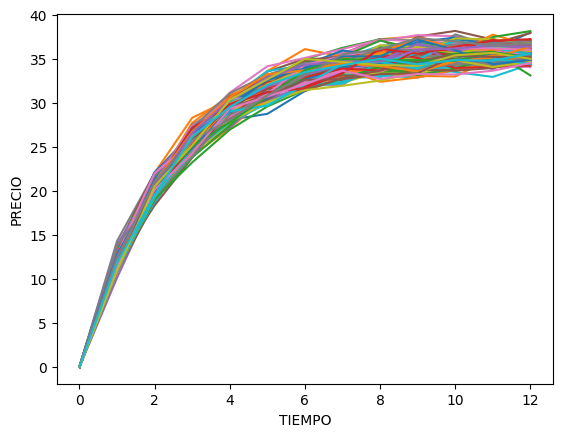

In [ ]:
T2 = 5
mu2 = 3*12
sigma2 = 0.3*np.sqrt(12)
X02 = 1
NS2 = 100
M2 = 12
xt2 = PathsOU(X02,mu2,sigma2,T2,NS2,M2)

plt.plot(np.transpose(xt2))
plt.xlabel("TIEMPO")
plt.ylabel("PRECIO")
plt.show()

d. El proceso Ornstein-Uhlenbeck se suelen utilizar para modelar la dinámica de la tasa
corta de interés. Por ejemplo, si rt denota el valor de la tasa corte de interés en el mercado,
esta se puede modelar como:

rt+dt = rt + (μ– rt)dt + σ(Wt+dt − Wt)

Teniendo en cuenta los siguientes parámetros: r0 = 0. 03, μ = 0. 05, σ = 0. 15, T =
1, NS = 100, dt = T/m; simule 100 posibles valores de la tasa de corta en el instante
T = 1, y utilice el valor promedio obtenido para valorar un bono cero cupón y facial 100 con
vencimiento en T. Presente gráficamente los resultados para las primeras 10 trayectorias del
proceso.

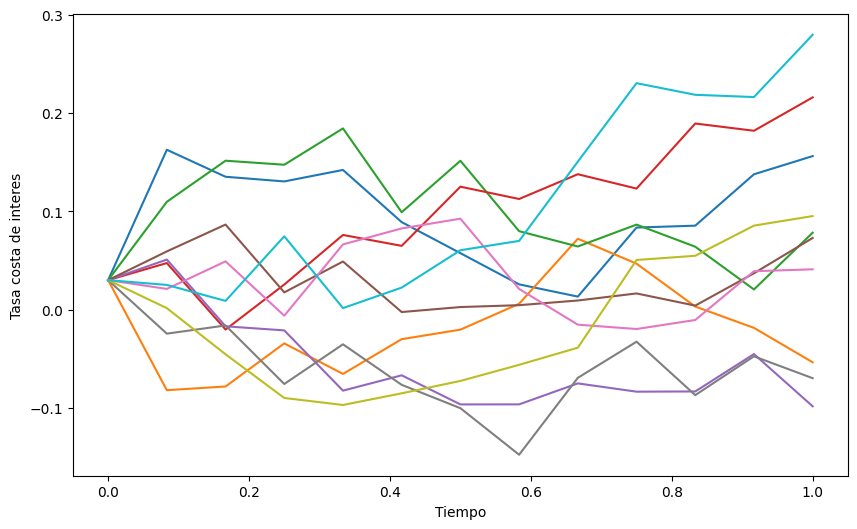

In [ ]:
r0 = 0.03
mu = 0.05
sigma = 0.15
T = 1
NS = 100
m = 12
dt = T/M

r = np.zeros((NS, m+1))
r[:,0] = r0
for i in range (NS):
  for j in range(m):
    r[i,j+1] = r[i,j] + (mu - r[i,j])*dt + sigma*np.random.normal()*np.sqrt(dt)
plt.figure(figsize=(10,6))
for i in range(10):
  plt.plot(np.linspace(0,T,m+1), r[i,:], label =f"Trayectoria {i+1}")
plt.xlabel("Tiempo")
plt.ylabel("Tasa costa de interes")
plt.show()

5. Escoja tres de los siguientes activos.

i. Gold futures (GC=F)
ii. Brent Oil futures (BZ=F)
iii. US Treasury Bill (^IRX)
iv. EURUSD currency (EURUSD=X)
v. GBPUSD currency (GBPUSD=X)
vi. Coffee futures (KC=F)
vii. Natural gas (NG=F)
viii. Cooper (HG=F)

Con la información de las series históricas para el periodo 2005-01-01 a 2022-12-31 con
periodicidad mensual, construya 100 trayectorias o simulaciones para cada serie para el año 2023. Para este ejercicio tenga en cuenta que las series pueden seguir un proceso
estocástico tipo MGB o de reversión a la media tipo OU.

a. La gráfica de las series históricas de los precios

[*********************100%***********************]  3 of 3 completed


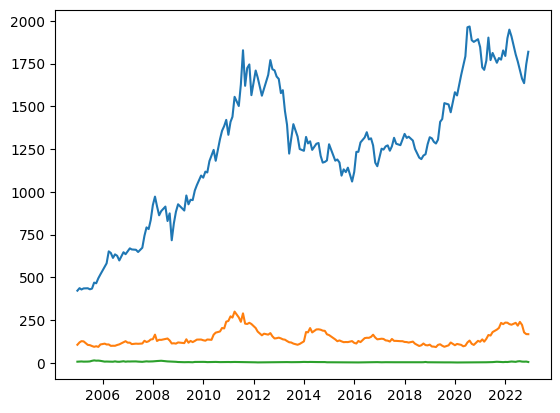

In [ ]:
precios = yf.download(["GC=F","KC=F","NG=F"], start='2005-01-01', end='2022-12-31', interval='1Mo')['Adj Close'].dropna()
retornos = np.log(precios/precios.shift()).dropna()
plt.plot(precios);

b. Los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

In [ ]:
pruebadf1 = adfuller(precios['GC=F'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.606097
P-value: 0.480530
Citical values:
	1%: -3.466398
	5%: -2.877380
	10%: -2.575214


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
pruebadf1 = adfuller(precios['KC=F'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.329256
P-value: 0.013620
Citical values:
	1%: -3.467420
	5%: -2.877826
	10%: -2.575452


In [ ]:
pruebadf1 = adfuller(precios['NG=F'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.157328
P-value: 0.022591
Citical values:
	1%: -3.468280
	5%: -2.878202
	10%: -2.575653


c. Los resultados de la simulación


In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M]) #el choque con normal estandar, NS es # trayectorias y M es la particion
    S = np.zeros([NS, M+1])
    S[:,0] = S0 #S0 es el precio inicial
    dt = T / M 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

Text(0.5, 0, 'Tiempo')

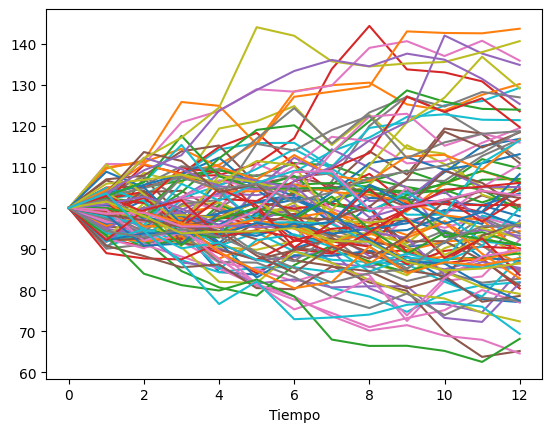

In [ ]:
# Oro
T = 1 
mu = retornos['GC=F'].mean()
sigma = retornos['GC=F'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

Text(0.5, 0, 'Tiempo')

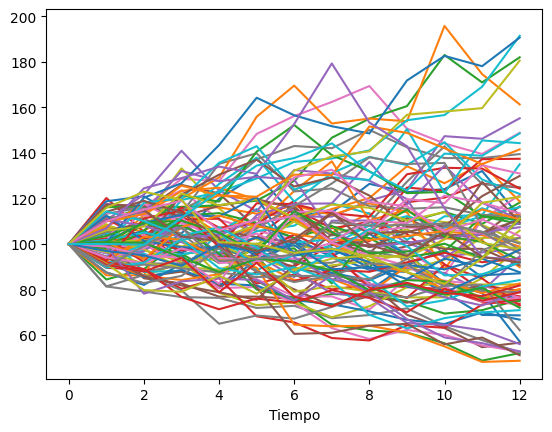

In [ ]:
# Cafe
T = 1 
mu = retornos['KC=F'].mean()
sigma = retornos['KC=F'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

Text(0.5, 0, 'Tiempo')

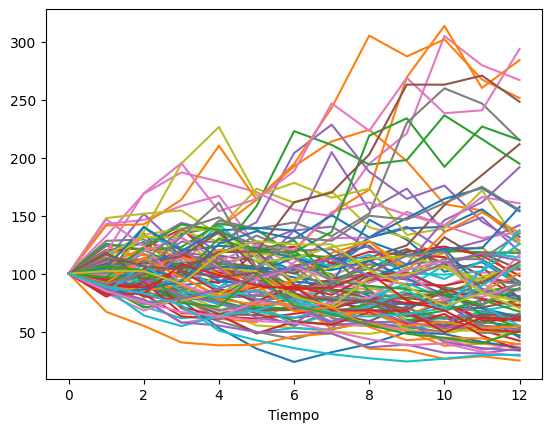

In [ ]:
# Gas Natural
T = 1 
mu = retornos['NG=F'].mean()
sigma = retornos['NG=F'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")